In [1]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hot_songs = pd.read_csv('df_top_100.csv')
not_hot_songs = pd.read_csv('df1.csv')

In [3]:
hot_songs.columns

Index(['title', 'artists', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'open_url'],
      dtype='object')

In [4]:
hot_songs.drop('track_id',  axis=1, inplace=True)

In [5]:
not_hot_songs.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'open_url', 'artist_name', 'title'],
      dtype='object')

In [6]:
not_hot_songs.drop('Unnamed: 0',  axis=1, inplace=True)
not_hot_songs.rename(columns={'artist_name': 'artists', 'title': 'title'}, inplace=True)


In [7]:
not_hot_songs = not_hot_songs.reindex(columns=['title', 'artists', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'open_url'])


In [8]:
not_hot_songs.drop('track_id',  axis=1, inplace=True)

In [9]:
not_hot_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url
0,Rock & Roll Renegade,The Frantic,0.820,0.285,0,-16.499,0,0.5020,0.24300,0.000007,...,0.230,95.955,audio_features,46rCJx8YdbP5ZaQyh57fwE,spotify:track:46rCJx8YdbP5ZaQyh57fwE,https://api.spotify.com/v1/tracks/46rCJx8YdbP5...,https://api.spotify.com/v1/audio-analysis/46rC...,172139,4,https://open.spotify.com/track/46rCJx8YdbP5ZaQ...
1,Undertow,Jackson United,0.434,0.726,7,-5.482,0,0.0330,0.03510,0.288000,...,0.700,92.751,audio_features,2Zv95uoSB1H4puVfAYbovF,spotify:track:2Zv95uoSB1H4puVfAYbovF,https://api.spotify.com/v1/tracks/2Zv95uoSB1H4...,https://api.spotify.com/v1/audio-analysis/2Zv9...,203560,4,https://open.spotify.com/track/2Zv95uoSB1H4puV...
2,Nothing To Hold Me,Jesus Jones,0.657,0.608,2,-13.565,1,0.0287,0.00880,0.000003,...,0.723,106.862,audio_features,3fcGGP62sllcNEhuFJVYeC,spotify:track:3fcGGP62sllcNEhuFJVYeC,https://api.spotify.com/v1/tracks/3fcGGP62sllc...,https://api.spotify.com/v1/audio-analysis/3fcG...,189293,4,https://open.spotify.com/track/3fcGGP62sllcNEh...
3,All The Answers,Jesus Jones,0.657,0.608,2,-13.565,1,0.0287,0.00880,0.000003,...,0.723,106.862,audio_features,3fcGGP62sllcNEhuFJVYeC,spotify:track:3fcGGP62sllcNEhuFJVYeC,https://api.spotify.com/v1/tracks/3fcGGP62sllc...,https://api.spotify.com/v1/audio-analysis/3fcG...,189293,4,https://open.spotify.com/track/3fcGGP62sllcNEh...
4,Clementina Santaf\xc3\xa8,Gloriana,0.645,0.683,11,-8.036,0,0.0536,0.42300,0.000000,...,0.742,93.470,audio_features,3XjTiKuAorW6CUmKaSZEvD,spotify:track:3XjTiKuAorW6CUmKaSZEvD,https://api.spotify.com/v1/tracks/3XjTiKuAorW6...,https://api.spotify.com/v1/audio-analysis/3XjT...,114933,4,https://open.spotify.com/track/3XjTiKuAorW6CUm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,Skank and Dub,Junior Reid,0.969,0.870,9,-4.805,1,0.1230,0.00416,0.005930,...,0.567,130.054,audio_features,1Ks2UH3WvpohH9q8b03NM7,spotify:track:1Ks2UH3WvpohH9q8b03NM7,https://api.spotify.com/v1/tracks/1Ks2UH3Wvpoh...,https://api.spotify.com/v1/audio-analysis/1Ks2...,200742,4,https://open.spotify.com/track/1Ks2UH3WvpohH9q...
2978,I Guess I'm Crazy,Jim Reeves,0.497,0.261,4,-13.869,1,0.0273,0.76100,0.000291,...,0.616,93.636,audio_features,4GPbOUUbitW3e6aEVccrhf,spotify:track:4GPbOUUbitW3e6aEVccrhf,https://api.spotify.com/v1/tracks/4GPbOUUbitW3...,https://api.spotify.com/v1/audio-analysis/4GPb...,142153,3,https://open.spotify.com/track/4GPbOUUbitW3e6a...
2979,Stop Breaking Down (1994 Digital Remaster),The Rolling Stones,0.522,0.891,9,-4.085,1,0.0322,0.50900,0.908000,...,0.910,104.411,audio_features,09eg3FGzsZQbZk8qEXhJIA,spotify:track:09eg3FGzsZQbZk8qEXhJIA,https://api.spotify.com/v1/tracks/09eg3FGzsZQb...,https://api.spotify.com/v1/audio-analysis/09eg...,274773,4,https://open.spotify.com/track/09eg3FGzsZQbZk8...
2980,Albo,Hevia,0.594,0.284,0,-16.440,0,0.0309,0.43800,0.876000,...,0.051,81.983,audio_features,2lAzmBq6991fuq3DbcL2hN,spotify:track:2lAzmBq6991fuq3DbcL2hN,https://api.spotify.com/v1/tracks/2lAzmBq6991f...,https://api.spotify.com/v1/audio-analysis/2lAz...,140671,4,https://open.spotify.com/track/2lAzmBq6991fuq3...


In [10]:
hot_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,...,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,https://open.spotify.com/track/1Qrg8KqiBpW07V7...
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,...,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,https://open.spotify.com/track/59uQI0PADDKeE6U...
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,...,0.646,117.999,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.14000,0.000000,...,0.742,147.991,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.48300,0.000019,...,0.834,147.989,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Memory Lane,Old Dominion,0.645,0.800,6,-4.272,1,0.0363,0.01890,0.000011,...,0.375,118.977,audio_features,5kB6WithhB8Iv08EMNmAbt,spotify:track:5kB6WithhB8Iv08EMNmAbt,https://api.spotify.com/v1/tracks/5kB6WithhB8I...,https://api.spotify.com/v1/audio-analysis/5kB6...,172480,4,https://open.spotify.com/track/5kB6WithhB8Iv08...
96,Love Again,The Kid LAROI,0.662,0.398,11,-6.691,0,0.0275,0.71600,0.000000,...,0.468,107.001,audio_features,4sx6NRwL6Ol3V6m9exwGlQ,spotify:track:4sx6NRwL6Ol3V6m9exwGlQ,https://api.spotify.com/v1/tracks/4sx6NRwL6Ol3...,https://api.spotify.com/v1/audio-analysis/4sx6...,145850,4,https://open.spotify.com/track/4sx6NRwL6Ol3V6m...
97,'98 Braves,Morgan Wallen,0.488,0.670,2,-5.759,1,0.0268,0.09690,0.000220,...,0.484,142.139,audio_features,3oZ6dlSfCE9gZ55MGPJctc,spotify:track:3oZ6dlSfCE9gZ55MGPJctc,https://api.spotify.com/v1/tracks/3oZ6dlSfCE9g...,https://api.spotify.com/v1/audio-analysis/3oZ6...,178704,4,https://open.spotify.com/track/3oZ6dlSfCE9gZ55...
98,Di Que Si,Grupo Marca Registrada X Grupo Frontera,0.570,0.589,9,-5.378,1,0.0488,0.07530,0.000000,...,0.796,182.318,audio_features,0kzN7YAMSbmlHOvxlbQW9y,spotify:track:0kzN7YAMSbmlHOvxlbQW9y,https://api.spotify.com/v1/tracks/0kzN7YAMSbml...,https://api.spotify.com/v1/audio-analysis/0kzN...,190554,4,https://open.spotify.com/track/0kzN7YAMSbmlHOv...


In [11]:
display(hot_songs.shape)
display(not_hot_songs.shape)

(100, 21)

(2982, 21)

In [12]:
import pickle

In [13]:
# Concatenate the two dataframes together
songs = pd.concat([hot_songs, not_hot_songs], axis=0)

# Add a new column to the songs dataframe to identify which dataset each song belongs to
songs["dataset"] = np.where(songs.index < hot_songs.shape[0], "hot_songs", "not_hot_songs")

# Select the audio features that we will use for clustering
audio_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key"]

# Standardize the audio features
scaler = StandardScaler()
songs_scaled = scaler.fit_transform(songs[audio_features])
filename = "scaler.pickle"

with open(filename, "wb") as file: 
        pickle.dump(scaler,file)

songs_scaled_df = pd.DataFrame(songs_scaled, columns = audio_features)
songs_scaled_df.head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key
0,0.402322,0.630123,0.701599,-0.443950,-0.884355,-0.103328,-0.172548,-0.368681,-0.976320,0.757847
1,-0.306049,0.398673,0.764416,-0.475560,0.293187,-0.541064,-0.234127,0.006580,2.771400,0.192785
2,0.753719,0.421818,0.946329,-0.186425,-0.852233,-0.541048,-0.965681,0.486914,-0.029578,-1.502402
3,1.819065,0.402531,0.796427,0.931068,-0.629978,-0.541064,-0.542020,0.847165,0.948908,1.040378
4,0.536188,0.718845,0.799869,-0.498802,0.362642,-0.541006,-0.648551,1.192405,0.948843,-0.089746


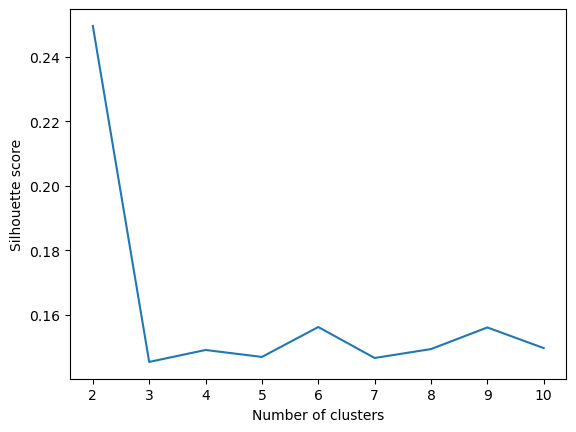

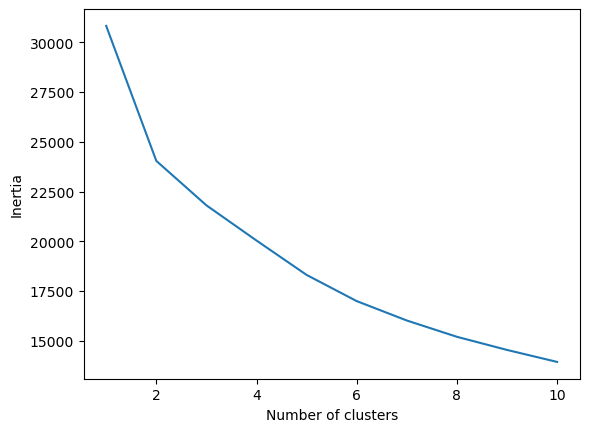

In [14]:
# Determine the optimal number of clusters
# We can use the elbow method to do this
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(songs_scaled)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(songs_scaled)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(songs_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

    

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# From the silhouette plot, it looks like 5 and 7 clusters is a good number

# Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1234).fit(songs_scaled)


In [15]:
# Train the K-Means model with 7 clusters
kmeans2 = KMeans(n_clusters=7, random_state=1234).fit(songs_scaled)

In [16]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [17]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [18]:
best_model = load("kmeans_5.pickle")

In [19]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(songs_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [20]:
clusters = kmeans.predict(songs_scaled_df)
pd.Series(clusters).value_counts().sort_index() 

0     342
1     273
2    1043
3     606
4     818
dtype: int64

In [21]:
best_model2 = load("kmeans_7.pickle")

In [22]:
kmeans2 = KMeans(n_clusters=7, random_state=1234)
kmeans2.fit(songs_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [23]:
clusters2 = kmeans2.predict(songs_scaled_df)
pd.Series(clusters2).value_counts().sort_index() 

0    167
1    568
2    635
3    508
4    629
5    333
6    242
dtype: int64

In [24]:
songs["cluster2"] = clusters2
songs.head()

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,...,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,hot_songs,2
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,...,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,https://open.spotify.com/track/59uQI0PADDKeE6U...,hot_songs,1
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,...,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,4
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,...,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,2
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,...,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,4


In [25]:
songs.to_csv("songs_clustered.csv", index=False)

In [26]:
songs["cluster"] = clusters
songs.head()

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,...,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,hot_songs,2,2
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,...,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,https://open.spotify.com/track/59uQI0PADDKeE6U...,hot_songs,1,4
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,...,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,4,2
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.1400,0.000000,...,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,2,2
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.4830,0.000019,...,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,4,2


In [27]:
pd.concat([group.sample(1) for _, group in songs.groupby("cluster")])

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
2306,Peer Gynt - Incidental Music (2004 Digital Rem...,Staatskapelle Dresden/Herbert Blomstedt,0.475,0.130,7,-17.719,1,0.0510,0.9160,0.956000,...,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827,4,https://open.spotify.com/track/14Qcrx6Dfjvcj0H...,not_hot_songs,5,0
2813,Mother Of Greed,Jason & The Scorchers,0.603,0.848,1,-5.269,0,0.3570,0.2320,0.000005,...,29DtFTbvA79yZv6DhexwwE,spotify:track:29DtFTbvA79yZv6DhexwwE,https://api.spotify.com/v1/tracks/29DtFTbvA79y...,https://api.spotify.com/v1/audio-analysis/29Dt...,230107,4,https://open.spotify.com/track/29DtFTbvA79yZv6...,not_hot_songs,6,1
654,Sabina,Sam Fan Thomas,0.710,0.885,1,-7.374,1,0.0611,0.0415,0.002440,...,4JAS9Ik7zdw2oWppTTBcDq,spotify:track:4JAS9Ik7zdw2oWppTTBcDq,https://api.spotify.com/v1/tracks/4JAS9Ik7zdw2...,https://api.spotify.com/v1/audio-analysis/4JAS...,428430,4,https://open.spotify.com/track/4JAS9Ik7zdw2oWp...,not_hot_songs,4,2
876,My Baby Don't Wear No Shoes,Roy Carrier,0.746,0.243,4,-15.134,0,0.1230,0.8290,0.000001,...,6VTbbVjKOC2qWagIDbkJrC,spotify:track:6VTbbVjKOC2qWagIDbkJrC,https://api.spotify.com/v1/tracks/6VTbbVjKOC2q...,https://api.spotify.com/v1/audio-analysis/6VTb...,215747,4,https://open.spotify.com/track/6VTbbVjKOC2qWag...,not_hot_songs,3,3
1565,Sound Clash,Dream Warriors,0.551,0.867,9,-7.853,0,0.0458,0.0246,0.000003,...,7AUFwSivoAvJoh1OJDLrGJ,spotify:track:7AUFwSivoAvJoh1OJDLrGJ,https://api.spotify.com/v1/tracks/7AUFwSivoAvJ...,https://api.spotify.com/v1/audio-analysis/7AUF...,288467,4,https://open.spotify.com/track/7AUFwSivoAvJoh1...,not_hot_songs,1,4


In [28]:
pd.concat([group.sample(1) for _, group in songs.groupby("cluster2")])

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2,cluster
1943,Crave and Wonder,Arc Angels,0.442,0.8820,2,-5.094,1,0.0776,0.12300,0.002020,...,0R3FSwrAOv4jUmQOxcoezH,spotify:track:0R3FSwrAOv4jUmQOxcoezH,https://api.spotify.com/v1/tracks/0R3FSwrAOv4j...,https://api.spotify.com/v1/audio-analysis/0R3F...,320333,4,https://open.spotify.com/track/0R3FSwrAOv4jUmQ...,not_hot_songs,0,4
1445,Caravane (Live 2006),Rapha\xc3\xabl,0.425,0.7830,8,-9.077,1,0.0808,0.00631,0.852000,...,2Xtsv7BUMrNodQWH2JPOc0,spotify:track:2Xtsv7BUMrNodQWH2JPOc0,https://api.spotify.com/v1/tracks/2Xtsv7BUMrNo...,https://api.spotify.com/v1/audio-analysis/2Xts...,555000,3,https://open.spotify.com/track/2Xtsv7BUMrNodQW...,not_hot_songs,1,4
755,Mental Beat,Hanoi Rocks,0.644,0.7250,11,-11.162,0,0.0568,0.00153,0.001430,...,1zs2X0ytogQL9UzyUwzjPI,spotify:track:1zs2X0ytogQL9UzyUwzjPI,https://api.spotify.com/v1/tracks/1zs2X0ytogQL...,https://api.spotify.com/v1/audio-analysis/1zs2...,303573,4,https://open.spotify.com/track/1zs2X0ytogQL9Uz...,not_hot_songs,2,2
1925,Another Last Shot (Album Version),Vivian,0.563,0.4250,4,-9.923,0,0.0367,0.85000,0.002450,...,5n5fY4p9zGBtt2jNJ4YPt6,spotify:track:5n5fY4p9zGBtt2jNJ4YPt6,https://api.spotify.com/v1/tracks/5n5fY4p9zGBt...,https://api.spotify.com/v1/audio-analysis/5n5f...,301183,4,https://open.spotify.com/track/5n5fY4p9zGBtt2j...,not_hot_songs,3,3
124,No Escapin' This,Beatnuts,0.763,0.6800,2,-6.523,1,0.2450,0.15500,0.000000,...,0V80HkM7kBvdFC81jV7CPt,spotify:track:0V80HkM7kBvdFC81jV7CPt,https://api.spotify.com/v1/tracks/0V80HkM7kBvd...,https://api.spotify.com/v1/audio-analysis/0V80...,231133,4,https://open.spotify.com/track/0V80HkM7kBvdFC8...,not_hot_songs,4,1
478,The Kangaroo Theory,Edelweiss,0.465,0.0289,3,-27.689,1,0.0430,0.99600,0.959000,...,4SMp3hkQV64IoaaKsBQoBo,spotify:track:4SMp3hkQV64IoaaKsBQoBo,https://api.spotify.com/v1/tracks/4SMp3hkQV64I...,https://api.spotify.com/v1/audio-analysis/4SMp...,123500,3,https://open.spotify.com/track/4SMp3hkQV64Ioaa...,not_hot_songs,5,0
2687,Passin' Me By,The Pharcyde,0.759,0.7560,4,-8.145,0,0.2660,0.09030,0.000002,...,4G3dZN9o3o2X4VKwt4CLts,spotify:track:4G3dZN9o3o2X4VKwt4CLts,https://api.spotify.com/v1/tracks/4G3dZN9o3o2X...,https://api.spotify.com/v1/audio-analysis/4G3d...,303493,4,https://open.spotify.com/track/4G3dZN9o3o2X4VK...,not_hot_songs,6,1


In [29]:
random_songs = pd.concat([group.sample(1) for _, group in songs.groupby("cluster2")])

In [30]:
random_songs= random_songs.drop('cluster', axis=1)

In [31]:
random_songs

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,cluster2
1366,Brok\xc3\xbfn N\xc3\xabedle,Ultimate Fakebook,0.533,0.253,5,-12.698,1,0.0306,0.8460,0.155000,...,audio_features,77cuLtsUljaHBNpG89GpqE,spotify:track:77cuLtsUljaHBNpG89GpqE,https://api.spotify.com/v1/tracks/77cuLtsUljaH...,https://api.spotify.com/v1/audio-analysis/77cu...,170280,4,https://open.spotify.com/track/77cuLtsUljaHBNp...,not_hot_songs,0
2764,Death Song,The Last Days Of Jesus,0.367,0.609,9,-11.221,0,0.0457,0.3010,0.024300,...,audio_features,60TYdVs6TWIsAJ1MPRdv59,spotify:track:60TYdVs6TWIsAJ1MPRdv59,https://api.spotify.com/v1/tracks/60TYdVs6TWIs...,https://api.spotify.com/v1/audio-analysis/60TY...,210547,4,https://open.spotify.com/track/60TYdVs6TWIsAJ1...,not_hot_songs,1
108,Lonely Street,Boots Randolph,0.686,0.825,7,-3.192,1,0.0582,0.2480,0.000000,...,audio_features,2xo84jGkxFPrZmmBtS3Pkd,spotify:track:2xo84jGkxFPrZmmBtS3Pkd,https://api.spotify.com/v1/tracks/2xo84jGkxFPr...,https://api.spotify.com/v1/audio-analysis/2xo8...,164853,4,https://open.spotify.com/track/2xo84jGkxFPrZmm...,not_hot_songs,2
2686,The Special Two (Australian Version),Missy Higgins,0.528,0.422,2,-6.947,1,0.0306,0.7700,0.000000,...,audio_features,0X0VaomeXDh13YjDh8jL8z,spotify:track:0X0VaomeXDh13YjDh8jL8z,https://api.spotify.com/v1/tracks/0X0VaomeXDh1...,https://api.spotify.com/v1/audio-analysis/0X0V...,267653,4,https://open.spotify.com/track/0X0VaomeXDh13Yj...,not_hot_songs,3
55,Lucille,Rockin' Dopsie_ Jr._ The Zydeco Twisters,0.654,0.810,0,-9.447,1,0.0592,0.2670,0.000436,...,audio_features,00AfLPQHP0SeZ1elf7M5Fv,spotify:track:00AfLPQHP0SeZ1elf7M5Fv,https://api.spotify.com/v1/tracks/00AfLPQHP0Se...,https://api.spotify.com/v1/audio-analysis/00Af...,259400,4,https://open.spotify.com/track/00AfLPQHP0SeZ1e...,hot_songs,4
1237,Blue Cave,Steve Smith,0.412,0.450,3,-7.951,0,0.2750,0.9690,0.929000,...,audio_features,04lLT0JuuTeQNCpRzJEs0R,spotify:track:04lLT0JuuTeQNCpRzJEs0R,https://api.spotify.com/v1/tracks/04lLT0JuuTeQ...,https://api.spotify.com/v1/audio-analysis/04lL...,160667,4,https://open.spotify.com/track/04lLT0JuuTeQNCp...,not_hot_songs,5
1110,Sometimes,Tanto Metro & Devonte,0.600,0.583,9,-6.617,0,0.2810,0.0918,0.000000,...,audio_features,00FU5uypELwgQuM9IbFC6G,spotify:track:00FU5uypELwgQuM9IbFC6G,https://api.spotify.com/v1/tracks/00FU5uypELwg...,https://api.spotify.com/v1/audio-analysis/00FU...,209053,5,https://open.spotify.com/track/00FU5uypELwgQuM...,not_hot_songs,6


In [32]:
random_songs.to_csv("random_songs.csv", index=False)

In [33]:
#cluster2 is the best option with 7 clusters

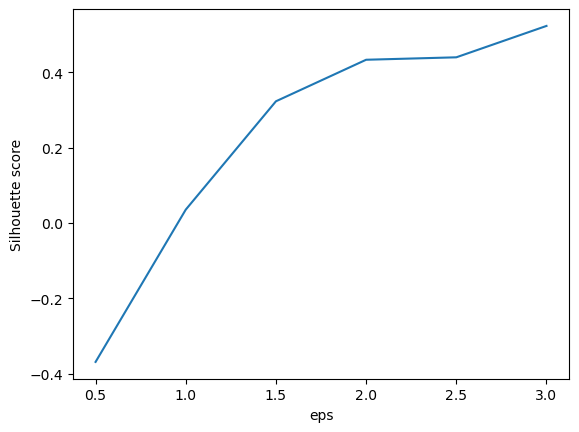

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



# Concatenate the two dataframes together
songs1 = pd.concat([hot_songs, not_hot_songs], axis=0)

# Add a new column to the songs dataframe to identify which dataset each song belongs to
songs1["dataset"] = np.where(songs1.index < hot_songs.shape[0], "hot_songs", "not_hot_songs")

# Select the audio features that we will use for clustering
audio_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key"]

# Standardize the audio features
scaler = StandardScaler()
songs_scaled = scaler.fit_transform(songs1[audio_features])
filename = "scaler.pickle"

with open(filename, "wb") as file: 
        pickle.dump(scaler,file)

songs_scaled_df = pd.DataFrame(songs_scaled, columns = audio_features)
songs_scaled_df.head()

# Determine the optimal value of eps
# We can use the silhouette score to do this
silhouette_scores = []
eps_range = np.linspace(0.5, 5, num=10)
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(songs_scaled)
    filename = "dbscan_" + str(eps) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(dbscan,file)
    labels = dbscan.labels_
    if len(set(labels)) > 1:
        silhouette_scores.append(silhouette_score(songs_scaled, labels))

plt.plot(eps_range[:len(silhouette_scores)], silhouette_scores)
plt.xlabel("eps")
plt.ylabel("Silhouette score")
plt.show()

# From the silhouette plot, it looks like eps=3.5 is a good value

# Train the DBSCAN model with eps=3.5
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(songs_scaled)


def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

scaler2 = load("scaler.pickle")
scaler2

best_model = load("dbscan_0.5.pickle")


dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(songs_scaled_df)


clusters = dbscan.labels_
pd.Series(clusters).value_counts().sort_index() 

songs1["dbscan_cluster"] = clusters

songs1.to_csv("songs1_clustered.csv", index=False)

In [35]:
songs1

,title,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,open_url,dataset,dbscan_cluster
0,Kill Bill,SZA,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,...,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,https://open.spotify.com/track/1Qrg8KqiBpW07V7...,hot_songs,-1
1,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,...,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,https://open.spotify.com/track/59uQI0PADDKeE6U...,hot_songs,-1
2,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,...,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,https://open.spotify.com/track/4DHcnVTT87F0zZh...,hot_songs,-1
3,Princess Diana,Ice Spice & Nicki Minaj,0.898,0.676,9,-5.196,1,0.1870,0.14000,0.000000,...,audio_features,0ZxhtATQ0a6EvQNZ0z6NKV,spotify:track:0ZxhtATQ0a6EvQNZ0z6NKV,https://api.spotify.com/v1/tracks/0ZxhtATQ0a6E...,https://api.spotify.com/v1/audio-analysis/0Zxh...,172125,4,https://open.spotify.com/track/0ZxhtATQ0a6EvQN...,hot_songs,-1
4,Ella Baila Sola,Eslabon Armado X Peso Pluma,0.668,0.758,5,-5.176,0,0.0332,0.48300,0.000019,...,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,https://open.spotify.com/track/3dnP0JxCgygwQH9...,hot_songs,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,Skank and Dub,Junior Reid,0.969,0.870,9,-4.805,1,0.1230,0.00416,0.005930,...,audio_features,1Ks2UH3WvpohH9q8b03NM7,spotify:track:1Ks2UH3WvpohH9q8b03NM7,https://api.spotify.com/v1/tracks/1Ks2UH3Wvpoh...,https://api.spotify.com/v1/audio-analysis/1Ks2...,200742,4,https://open.spotify.com/track/1Ks2UH3WvpohH9q...,not_hot_songs,-1
2978,I Guess I'm Crazy,Jim Reeves,0.497,0.261,4,-13.869,1,0.0273,0.76100,0.000291,...,audio_features,4GPbOUUbitW3e6aEVccrhf,spotify:track:4GPbOUUbitW3e6aEVccrhf,https://api.spotify.com/v1/tracks/4GPbOUUbitW3...,https://api.spotify.com/v1/audio-analysis/4GPb...,142153,3,https://open.spotify.com/track/4GPbOUUbitW3e6a...,not_hot_songs,-1
2979,Stop Breaking Down (1994 Digital Remaster),The Rolling Stones,0.522,0.891,9,-4.085,1,0.0322,0.50900,0.908000,...,audio_features,09eg3FGzsZQbZk8qEXhJIA,spotify:track:09eg3FGzsZQbZk8qEXhJIA,https://api.spotify.com/v1/tracks/09eg3FGzsZQb...,https://api.spotify.com/v1/audio-analysis/09eg...,274773,4,https://open.spotify.com/track/09eg3FGzsZQbZk8...,not_hot_songs,-1
2980,Albo,Hevia,0.594,0.284,0,-16.440,0,0.0309,0.43800,0.876000,...,audio_features,2lAzmBq6991fuq3DbcL2hN,spotify:track:2lAzmBq6991fuq3DbcL2hN,https://api.spotify.com/v1/tracks/2lAzmBq6991f...,https://api.spotify.com/v1/audio-analysis/2lAz...,140671,4,https://open.spotify.com/track/2lAzmBq6991fuq3...,not_hot_songs,-1


In [36]:
cluster_counts = songs1['dbscan_cluster'].value_counts()
print(cluster_counts)


-1     2998
 8        4
 19       4
 16       4
 11       4
 25       4
 3        4
 5        3
 2        3
 24       3
 23       3
 22       3
 21       3
 20       3
 1        3
 18       3
 17       3
 15       3
 6        3
 14       3
 13       3
 0        3
 10       3
 9        3
 4        3
 7        3
 12       3
Name: dbscan_cluster, dtype: int64


In [37]:
#We will use Kmeans with 7 clusters